# REIT

- MSCI US REIT Custom Capped Index (BBRE)
- IFGL

In [2]:
import sys
import os
module_path = os.path.abspath(os.path.join('../..'))
if module_path not in sys.path:
    sys.path.append(module_path)

import pandas as pd
import polars as pl
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import japanize_matplotlib
import seaborn as sns
from dividends_reinvestment_return import dividends_reinvestment_return

## BBRE

In [92]:
tiskers = yf.Tickers(['IYR', 'JPY=X'])
historical_data = tiskers.history(period='max', interval='1d')

bbre_df = pl.DataFrame({
    'Date': historical_data.index,
    'Close': historical_data['Close']['IYR'] * historical_data['Close']['JPY=X'],
    'Dividends': historical_data['Dividends']['IYR'] * historical_data['Close']['JPY=X'],
}).with_columns(
    pl.col('Date').cast(pl.Date),
).drop_nulls()
end_of_month = bbre_df['Date'].dt.month_end().unique()
bbre_df = bbre_df.filter(pl.col('Date').is_in(end_of_month))

bbre_df = dividends_reinvestment_return(bbre_df, initial_shares=10000)

years = len(bbre_df['Date']) / 12
v_first = bbre_df['Value'][0]
v_last = bbre_df['Value'][-1]
bbre_cagr = (v_last / v_first) ** (1 / years) - 1
print(f'IYR CAGR: {bbre_cagr:.2%}')

bbre_vol = bbre_df['Value'].log().diff().drop_nulls().std() * np.sqrt(12)
print(f'IYR Volatility: {bbre_vol:.2%}')

rf = 0
bbre_sharp_ratio = (bbre_cagr - rf) / bbre_vol
print(f'IYR Sharp Ratio: {bbre_sharp_ratio:.2f}')

[*********************100%***********************]  2 of 2 completed

IYR CAGR: 14.37%
IYR Volatility: 26.39%
IYR Sharp Ratio: 0.54


In [75]:
bbre_df

Date,Close,Dividends,Shares,Value,LogValue,LogReturn,Return
datetime[ns],f64,f64,f64,f64,f64,f64,f64
2000-06-30 00:00:00,1410.303071,0.0,10000.0,1.4103e7,16.4619,0.0,0.0
2000-07-31 00:00:00,1546.837541,0.0,10000.0,1.5468e7,16.554308,0.092408,9.681215
2000-08-31 00:00:00,1486.440874,0.0,10000.0,1.4864e7,16.51448,0.05258,5.398684
2000-10-31 00:00:00,1474.725375,0.0,10000.0,1.4747e7,16.506567,0.044667,4.567976
2000-11-30 00:00:00,1526.893839,0.0,10000.0,1.5269e7,16.541331,0.079431,8.267072
…,…,…,…,…,…,…,…
2024-07-31 00:00:00,14199.641173,0.0,10000.0,1.4200e8,18.771312,2.309412,906.850333
2024-09-30 00:00:00,14426.049818,0.0,10000.0,1.4426e8,18.787131,2.325231,922.904233
2024-10-31 00:00:00,14937.996123,0.0,10000.0,1.4938e8,18.822004,2.360103,959.204679


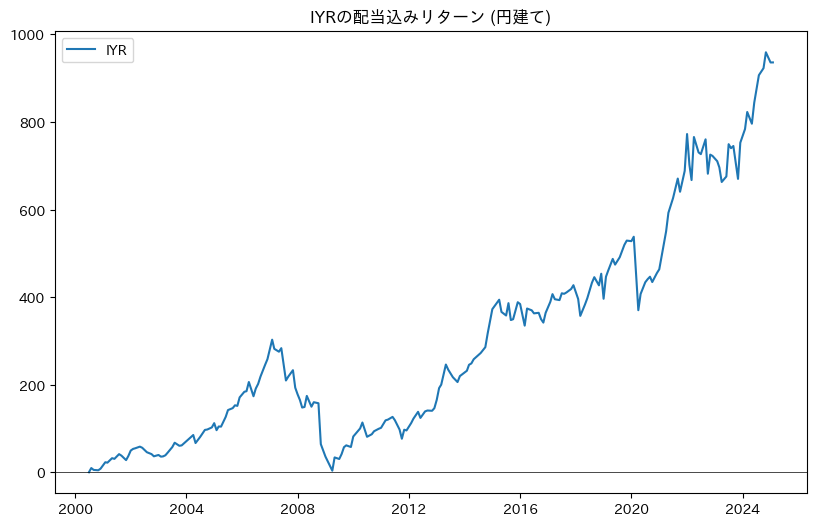

In [93]:
fig, ax = plt.subplots(figsize=(1.618*6, 6))
ax.plot(bbre_df['Date'], bbre_df['Return'], label='IYR')
ax.axhline(0, color='black', linewidth=0.5)
ax.set_title(f'IYRの配当込みリターン (円建て)')
ax.legend()

## IFGL

In [94]:
tiskers = yf.Tickers(['IFGL', 'JPY=X'])
historical_data = tiskers.history(period='max', interval='1d')

ifgl_df = pl.DataFrame({
    'Date': historical_data.index,
    'Close': historical_data['Close']['IFGL'] * historical_data['Close']['JPY=X'],
    'Dividends': historical_data['Dividends']['IFGL'] * historical_data['Close']['JPY=X'],
}).with_columns(
    pl.col('Date').cast(pl.Date),
).drop_nulls()
end_of_month = ifgl_df['Date'].dt.month_end().unique()
ifgl_df = ifgl_df.filter(pl.col('Date').is_in(end_of_month))

ifgl_df = dividends_reinvestment_return(ifgl_df, initial_shares=10000)

years = len(ifgl_df['Date']) / 12
v_first = ifgl_df['Value'][0]
v_last = ifgl_df['Value'][-1]
ifgl_cagr = (v_last / v_first) ** (1 / years) - 1
print(f'IFGL CAGR: {ifgl_cagr:.2%}')

ifgl_vol = ifgl_df['Value'].log().diff().drop_nulls().std() * np.sqrt(12)
print(f'IFGL Volatility: {ifgl_vol:.2%}')

rf = 0
ifgl_sharp_ratio = (ifgl_cagr - rf) / ifgl_vol
print(f'IFGL Sharp Ratio: {ifgl_sharp_ratio:.2f}')

[*********************100%***********************]  2 of 2 completed

IFGL CAGR: 2.15%
IFGL Volatility: 24.96%
IFGL Sharp Ratio: 0.09


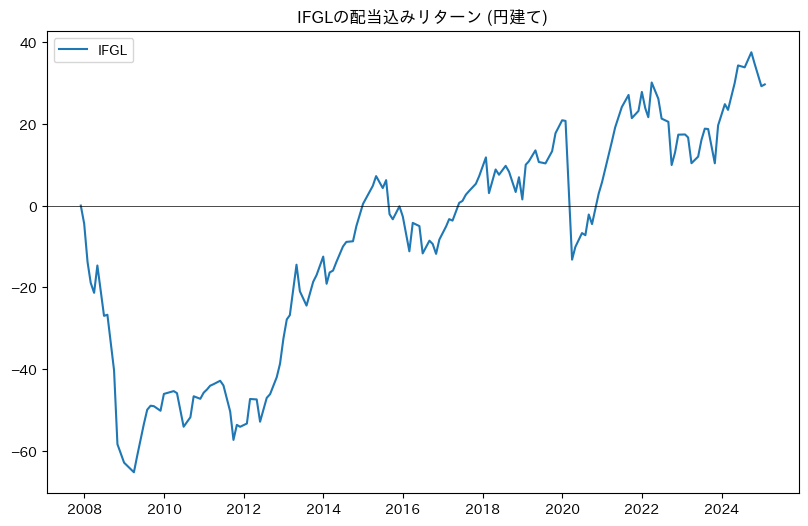

In [95]:
fig, ax = plt.subplots(figsize=(1.618*6, 6))
ax.plot(ifgl_df['Date'], ifgl_df['Return'], label=f'IFGL')
ax.axhline(0, color='black', linewidth=0.5)
ax.set_title('IFGLの配当込みリターン (円建て)')
ax.legend()

## eMAXIS 欧州リートインデックス

In [120]:
df = pl.read_parquet('../../../../data/raw/investment_trust.parquet')
eu_df = df.filter(pl.col('investment_trust_association_japan_code') == '3313161')
end_of_month = eu_df['date'].dt.month_end().unique()
eu_df = eu_df.filter(pl.col('date').is_in(end_of_month))

years = len(eu_df['date']) / 12
v_first = eu_df['nav'][0]
v_last = eu_df['nav'][-1]
eu_cagr = (v_last / v_first) ** (1 / years) - 1
print(f'EU CAGR: {eu_cagr:.2%}')

eu_vol = eu_df['nav'].log().diff().drop_nulls().std() * np.sqrt(12)
print(f'EU Volatility: {eu_vol:.2%}')

rf = 0
eu_sharp_ratio = (eu_cagr - rf) / eu_vol
print(f'EU Sharp Ratio: {eu_sharp_ratio:.2f}')

EU CAGR: 0.90%
EU Volatility: 31.27%
EU Sharp Ratio: 0.03


Text(0, 0.5, 'リターン (%)')

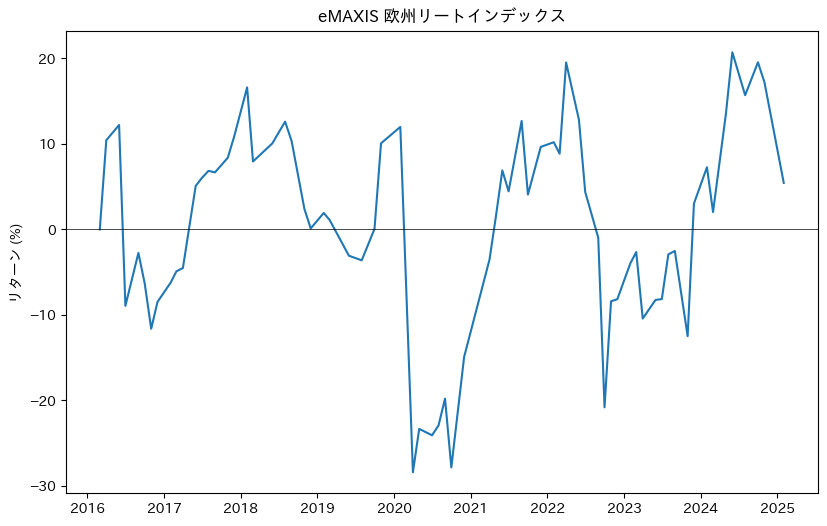

In [98]:
log_return = eu_df['nav'].log() - eu_df['nav'].log()[0]
r = (np.exp(log_return) - 1) * 100

fig, ax = plt.subplots(figsize=(1.618*6, 6))
ax.plot(eu_df['date'], r, label='EU')
ax.axhline(0, color='black', lw=0.5)
ax.set_title('eMAXIS 欧州リートインデックス')
ax.set_ylabel('リターン (%)')

## eMAXIS 新興国リートインデックス

In [121]:
df = pl.read_parquet('../../../../data/raw/investment_trust.parquet')
em_df = df.filter(pl.col('investment_trust_association_japan_code') == '0331213B')
end_of_month = em_df['date'].dt.month_end().unique()
em_df = em_df.filter(pl.col('date').is_in(end_of_month))

years = len(em_df['date']) / 12
v_first = em_df['nav'][0]
v_last = em_df['nav'][-1]
em_cagr = (v_last / v_first) ** (1 / years) - 1
print(f'em CAGR: {em_cagr:.2%}')

em_vol = em_df['nav'].log().diff().drop_nulls().std() * np.sqrt(12)
print(f'em Volatility: {em_vol:.2%}')

rf = 0
em_sharp_ratio = (em_cagr - rf) / em_vol
print(f'em Sharp Ratio: {em_sharp_ratio:.2f}')

em CAGR: 3.13%
em Volatility: 28.83%
em Sharp Ratio: 0.11


Text(0, 0.5, 'リターン (%)')

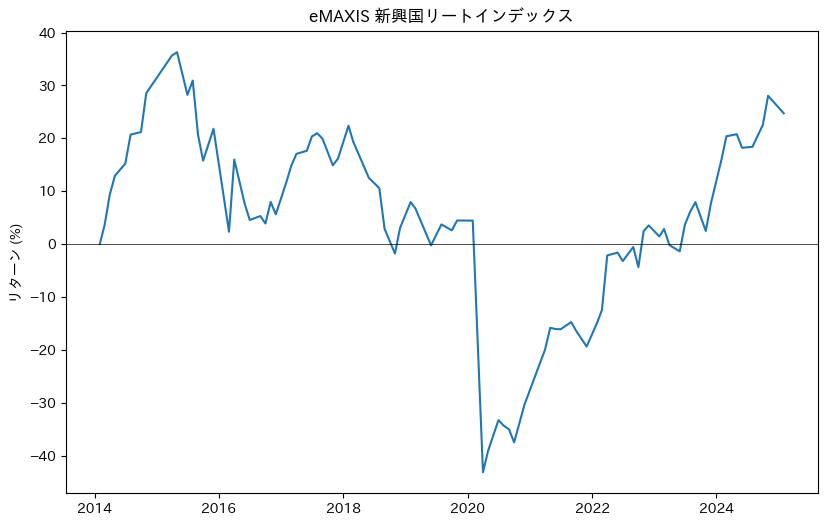

In [100]:
log_return = em_df['nav'].log() - em_df['nav'].log()[0]
r = (np.exp(log_return) - 1) * 100

fig, ax = plt.subplots(figsize=(1.618*6, 6))
ax.plot(em_df['date'], r, label='EM')
ax.axhline(0, color='black', lw=0.5)
ax.set_title('eMAXIS 新興国リートインデックス')
ax.set_ylabel('リターン (%)')

## REIT ポートフォリオ

In [165]:
sum_inv_vol = 1 / bbre_vol + 1 / ifgl_vol + 1 / eu_vol + 1 / em_vol
weights = np.array([
    (1 / bbre_vol) / sum_inv_vol,
    (1 / ifgl_vol) / sum_inv_vol,
    (1 / eu_vol) / sum_inv_vol,
    (1 / em_vol) / sum_inv_vol,
])

weights = np.array([0.26, 0.28, 0.22, 0.24])

cagr = np.array([bbre_cagr, ifgl_cagr, eu_cagr, em_cagr])

return_p = weights @ cagr

print(f'Portfolio CAGR: {return_p:.2%}')

us_df_tmp = pl.DataFrame({
    'date': bbre_df['Date'],
    'US': bbre_df['Value'].log(),
})
exus_df_tmp = pl.DataFrame({
    'date': ifgl_df['Date'],
    'exUS': ifgl_df['Value'].log(),
})
eu_df_tmp = pl.DataFrame({
    'date': eu_df['date'],
    'EU': eu_df['nav'].log(),
})
em_df_tmp = pl.DataFrame({
    'date': em_df['date'],
    'EM': em_df['nav'].log(),
})

df = us_df_tmp.join(
    exus_df_tmp, on='date', how='left'
).join(
    eu_df_tmp, on='date', how='left'
).join(
    em_df_tmp, on='date', how='left'
).drop_nulls()

tmp = np.array([
    df['US'].diff().drop_nulls(),
    df['exUS'].diff().drop_nulls(),
    df['EU'].diff().drop_nulls(),
    df['EM'].diff().drop_nulls(),
])
Sigma = np.cov(tmp)
sigma_p = np.sqrt(weights @ Sigma @ weights.T) * np.sqrt(12)
print(f'Portfolio Volatility: {sigma_p:.2%}')

rf = 0
sharp_ratio = (return_p - rf) / sigma_p
print(f'Portfolio Sharp Ratio: {sharp_ratio:.2f}')

Portfolio CAGR: 5.29%
Portfolio Volatility: 23.24%
Portfolio Sharp Ratio: 0.23


Text(0.5, 1.0, 'REIT ポートフォリオ')

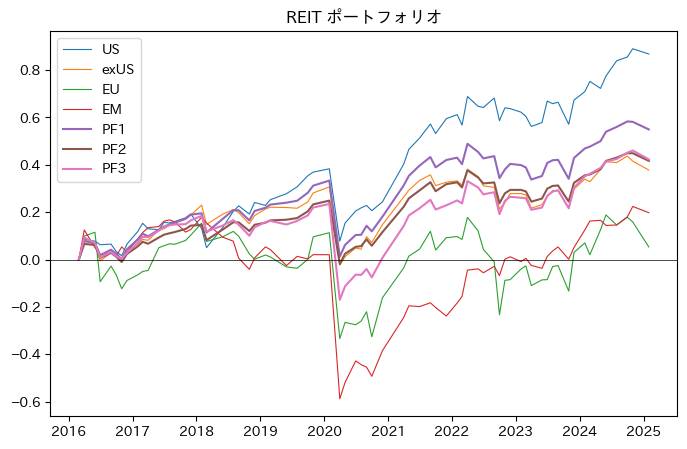

In [168]:
us = df['US'] - df['US'][0]
exus = df['exUS'] - df['exUS'][0]
eu = df['EU'] - df['EU'][0]
em = df['EM'] - df['EM'][0]

fig, ax = plt.subplots(figsize=(1.618*5, 5))
ax.plot(df['date'], us, label='US', lw=0.8)
ax.plot(df['date'], exus, label='exUS', lw=0.8)
ax.plot(df['date'], eu, label='EU', lw=0.8)
ax.plot(df['date'], em, label='EM', lw=0.8)

pf_1 = 0.35 * us + 0.65 * exus
ax.plot(df['date'], pf_1, label='PF1', lw=1.5)

pf_2 = 0.3 * us + 0.4 * exus + 0.1 * eu
ax.plot(df['date'], pf_2, label='PF2', lw=1.5)

pf_3 = 0.25 * us + 0.4 * exus + 0.1 * eu + 0.25 * em
ax.plot(df['date'], pf_3, label='PF3', lw=1.5)

ax.axhline(0, color='black', lw=0.5)
ax.legend()
ax.set_title('REIT ポートフォリオ')

## 地域比率

In [323]:
# america, asia_pasific, emea
america = 5.63
asia_pasific = 59.4
emea = 34.95
x = np.array([america, asia_pasific, emea])
mean_region = np.mean(x)
deviation_squared_sum = (america - mean_region)**2 + (asia_pasific - mean_region)**2 + (emea - mean_region)
region_variance = deviation_squared_sum / 3
print(f'偏差２乗和: {deviation_squared_sum:.2f}')

偏差２乗和: 1448.55


## 効率的フロンティア

In [332]:
tiskers = ['IYR', 'IFGL', 'JPY=X']
historical_data = yf.download(tiskers, period='max', interval='1mo')
df = pl.DataFrame({
    'Date': historical_data.index,
    'IYR_close': historical_data['Close']['IYR'] * historical_data['Close']['JPY=X'],
    'IFGL_close': historical_data['Close']['IFGL'] * historical_data['Close']['JPY=X'],
}).with_columns(
    pl.col('Date').cast(pl.Date),
    pl.col('IYR_close').log().alias('IYR_log'),
    pl.col('IFGL_close').log().alias('IFGL_log'),
).drop_nulls()
df = df.with_columns([
    (df['IYR_log'] - df['IYR_log'][0]).alias('IYR_log_r'),
    (df['IFGL_log'] - df['IFGL_log'][0]).alias('IFGL_log_r'),
])
v_df = df.with_columns([
    pl.col('IYR_close').log().diff().fill_null(0).alias('IYR_lr'),
    pl.col('IFGL_close').log().diff().fill_null(0).alias('IFGL_lr'),
]).drop(['IYR_close', 'IFGL_close'])

[*********************100%***********************]  3 of 3 completed


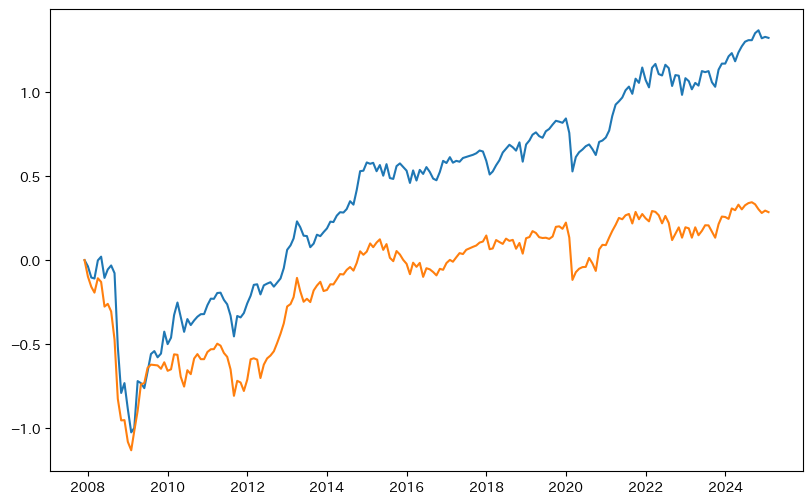

In [333]:
fig, ax = plt.subplots(figsize=(1.618*6, 6))
ax.plot(df['Date'], df['IYR_log_r'], label='IYR')
ax.plot(df['Date'], df['IFGL_log_r'], label='IFGL')

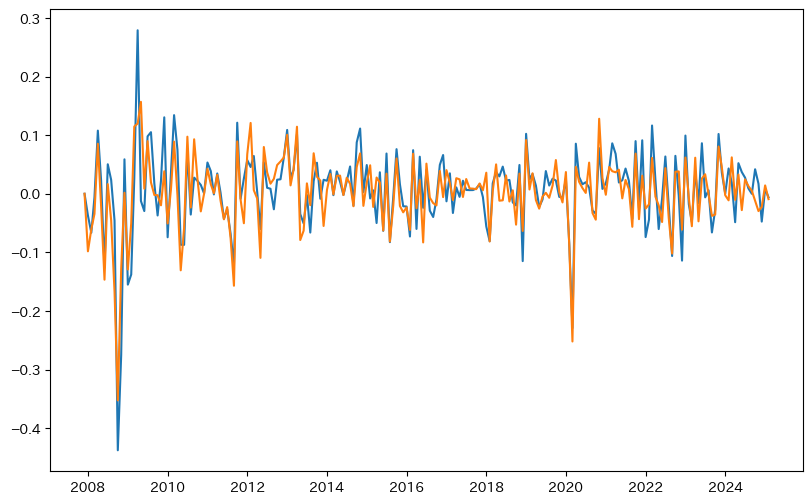

In [334]:
fig, ax = plt.subplots(figsize=(1.618*6, 6))
ax.plot(v_df['Date'], v_df['IYR_lr'], label='IYR')
ax.plot(v_df['Date'], v_df['IFGL_lr'], label='IFGL')

In [335]:
trade_days = 12
T = len(v_df) / trade_days
IYR_r = (df['IYR_close'][-1] / df['IYR_close'][0]) ** (1/T) - 1
IFGL_r = (df['IFGL_close'][-1] / df['IFGL_close'][0]) ** (1/T) - 1
print(f'IYR return: {IYR_r:.2%}')
print(f'IFGL return: {IFGL_r:.2%}')

IYR_vol = np.std(v_df['IYR_lr'].to_numpy()) * np.sqrt(trade_days)
IFGL_vol = np.std(v_df['IFGL_lr'].to_numpy()) * np.sqrt(trade_days)
print(f'IYR volatility: {IYR_vol:.2%}')
print(f'IFGL volatility: {IFGL_vol:.2%}')

IYR return: 7.96%
IFGL return: 1.67%
IYR volatility: 23.84%
IFGL volatility: 21.00%


In [336]:
w = np.array([0.3, 0.7])

r_p = w @ np.array([IYR_r, IFGL_r])
print(f'returm: {r_p:.2%}')

tmp = np.array([v_df['IYR_lr'], v_df['IFGL_lr']])
Sigma = np.cov(tmp)
sigma_p = np.sqrt(w.T @ Sigma @ w)
sigma_p_annual = sigma_p * np.sqrt(trade_days)
print(f'US: {w[0]:.0%}, exUS: {w[1]:.0%}')
print(f'Volatility: {sigma_p_annual:.2%}')


returm: 3.55%
US: 30%, exUS: 70%
Volatility: 21.00%


In [337]:
def calc_portfolio_volatility(w, v_df):
    tmp = np.array([v_df['IYR_lr'], v_df['IFGL_lr']])
    Sigma = np.cov(tmp)
    sigma_p_2 = w.T @ Sigma @ w
    sigma_p = np.sqrt(sigma_p_2)
    sigma_p_annual = sigma_p * np.sqrt(trade_days)
    return sigma_p_annual

wgh_list = [
    np.array([0, 1]),
    np.array([0.05, 0.95]),
    np.array([0.1, 0.9]),
    np.array([0.15, 0.85]),
    np.array([0.2, 0.8]),
    np.array([0.25, 0.75]),
    np.array([0.3, 0.7]),
    np.array([0.35, 0.65]),
    np.array([0.4, 0.6]),
    np.array([0.45, 0.55]),
    np.array([0.5, 0.5]),
    np.array([0.55, 0.45]),
    np.array([0.6, 0.4]),
    np.array([0.65, 0.35]),
    np.array([0.7, 0.3]),
    np.array([0.75, 0.25]),
    np.array([0.8, 0.2]),
    np.array([0.85, 0.15]),
    np.array([0.9, 0.1]),
    np.array([0.95, 0.05]),
    np.array([1, 0]),
]

return_list = [w @ np.array([IYR_r, IFGL_r]) for w in wgh_list]
sigma_list = [calc_portfolio_volatility(w, v_df) for w in wgh_list]

efficient_frontier = pl.DataFrame({
    'weight': [f'{w[0]:.0%} US' for w in wgh_list],
    'Return': return_list,
    'Volatility': sigma_list,
}).with_columns([
    (pl.col('Return') / pl.col('Volatility')).alias('SharpRatio')
])
efficient_frontier

weight,Return,Volatility,SharpRatio
str,f64,f64,f64
"""0% US""",0.016665,0.210507,0.079165
"""5% US""",0.01981,0.209859,0.094399
"""10% US""",0.022956,0.209439,0.109608
"""15% US""",0.026102,0.209247,0.124742
"""20% US""",0.029248,0.209285,0.139751
…,…,…,…
"""80% US""",0.066997,0.226871,0.295306
"""85% US""",0.070142,0.229637,0.305448
"""90% US""",0.073288,0.232577,0.315113


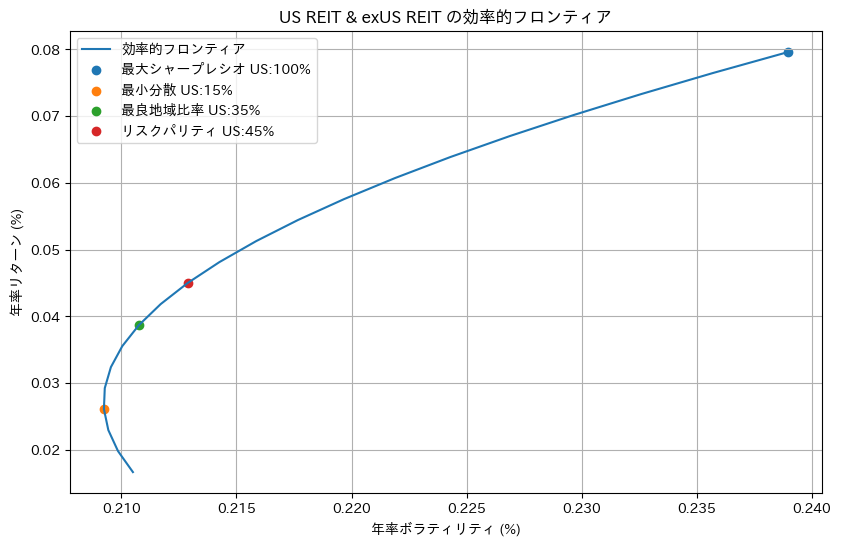

In [ ]:
max_sharp_ratio = efficient_frontier.filter(pl.col('SharpRatio') == efficient_frontier['SharpRatio'].max())
min_volatility = efficient_frontier.filter(pl.col('Volatility') == efficient_frontier['Volatility'].min())
us_35per = efficient_frontier.filter(pl.col('weight') == '35% US')
risk_parity = efficient_frontier.filter(pl.col('weight') == '45% US')

fig, ax = plt.subplots(figsize=(1.618*6, 6))
ax.plot(efficient_frontier['Volatility'], efficient_frontier['Return'], label='効率的フロンティア')
ax.scatter(max_sharp_ratio['Volatility'], max_sharp_ratio['Return'], label='最大シャープレシオ US:100%')
ax.scatter(min_volatility['Volatility'], min_volatility['Return'], label='最小分散 US:15%')
ax.scatter(us_35per['Volatility'], us_35per['Return'], label='最良地域比率 US:35%')
ax.scatter(risk_parity['Volatility'], risk_parity['Return'], label='リスクパリティ US:45%')
ax.set_xlabel('年率ボラティリティ (%)')
ax.set_ylabel('年率リターン (%)')
ax.set_title('US REIT & exUS REIT の効率的フロンティア')
ax.legend()
ax.grid(True)

In [363]:
inv_iyr_vol = 1 / IYR_vol
inv_ifgl_vol = 1 / IFGL_vol
sum_inv_vol = inv_iyr_vol + inv_ifgl_vol
iry_w = inv_iyr_vol / sum_inv_vol
ifgl_w = inv_ifgl_vol / sum_inv_vol
print(f'IYR weight: {iry_w:.2%}')
print(f'IFGL weight: {ifgl_w:.2%}')

print(f'US vol: {IYR_vol:.2%}')
print(f'exUS vol: {IFGL_vol:.2%}')
risk_parity_vol = risk_parity['Volatility'].to_numpy()[0]
print(f'Risk parity: {risk_parity_vol:.2%}')

IYR weight: 46.84%
IFGL weight: 53.16%
US vol: 23.84%
exUS vol: 21.00%
Risk parity: 21.29%
